In [1]:
using Revise
using MGVInference

┌ Info: Precompiling MGVInference [adafd34d-b6c4-4402-9c42-0a5fd7754124]
└ @ Base loading.jl:1278


In [2]:
fft_gp_model = "../test/test_models/fft_gp.jl"
open(fft_gp_model, "r") do io
    map(println, readlines(io))
end
include(fft_gp_model)

# This file is a part of MGVInference.jl, licensed under the MIT License (MIT).

import Base: *, adjoint
import AbstractFFTs
import FFTW: plan_r2r, DHT
import ForwardDiff
import Random: randn, MersenneTwister
import Distributions: Normal
import ValueShapes: NamedTupleDist
import Zygote
import LinearAlgebra: Diagonal

_dims = 40
_k = [i < _dims / 2 ? i : _dims-i for i = 0:_dims-1]

# Define the harmonic transform operator as a matrix-like object
_ht = plan_r2r(zeros(_dims), DHT)

# Unfortunately neither Zygote nor ForwardDiff support planned Hartley
# transformations. While Zygote does not support AbstractFFTs.ScaledPlan,
# ForwardDiff does not overload the appropriate methods from AbstractFFTs.
function _plan_dual_product(trafo::AbstractFFTs.Plan, u::Vector{ForwardDiff.Dual{T, V, N}}) where {T, V, N}
    # Unpack AoS -> SoA
    vs = ForwardDiff.value.(u)
    ps = mapreduce(ForwardDiff.partials, hcat, u)
    # Actual computation
    val = trafo * vs
    jvp = [trafo*t[:] for t in eachro

In [13]:
using Distributions
using Random
using ValueShapes
using LinearAlgebra
using Optim
using Plots

In [4]:
data = rand(model(true_params), 1)[1];

In [5]:
_common_grid = [1:_dims...];

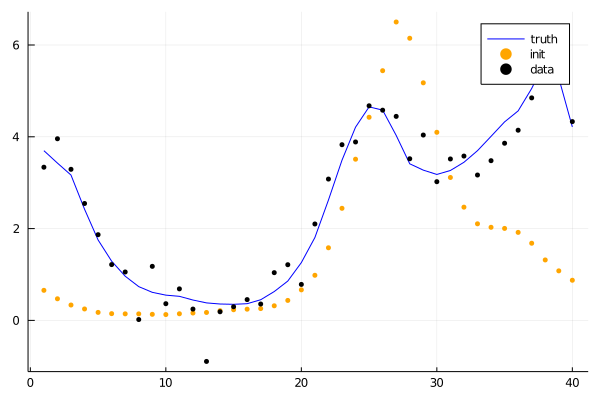

In [6]:
init_plots =() -> let
    truth = _mean(true_params)
    plot!(_common_grid, truth, markercolor=:blue, linecolor=:blue, label="truth")
    scatter!(_common_grid, _mean(starting_point), markercolor=:orange, markerstrokewidth=0, markersize=3, label="init")
    scatter!(_common_grid, MGVInference.unshaped(data), markercolor=:black, markerstrokewidth=0, markersize=3, label="data")
end
plot()
init_plots()

In [7]:
first_iteration = mgvi_kl_optimize_step(model, data, starting_point; jacobian_func=FwdRevADJacobianFunc, residual_sampler=ImplicitResidualSampler)

display(hcat(first_iteration.result, true_params))

40×2 Array{Float64,2}:
  0.339621    0.48151
 -0.844095   -0.564916
  2.14009     1.63042
 -0.459984   -1.14073
  0.108016    0.867529
 -0.379951    0.0598623
 -0.501476   -1.64938
 -0.620282   -0.552528
 -0.0835519  -0.472529
 -0.360006   -0.468033
 -0.057287   -0.200177
 -0.156967   -0.944585
  0.0478841   0.75603
  ⋮          
 -0.402799   -0.268811
 -0.202115    0.0891861
 -0.526222   -2.73701
 -0.251873   -1.57267
 -0.493563   -0.859427
 -0.522093   -0.795277
 -0.542027   -0.75824
  0.113184   -0.572864
 -0.101712   -0.559156
  0.371183    0.841274
  0.720467    0.298653
  1.44257     1.25313

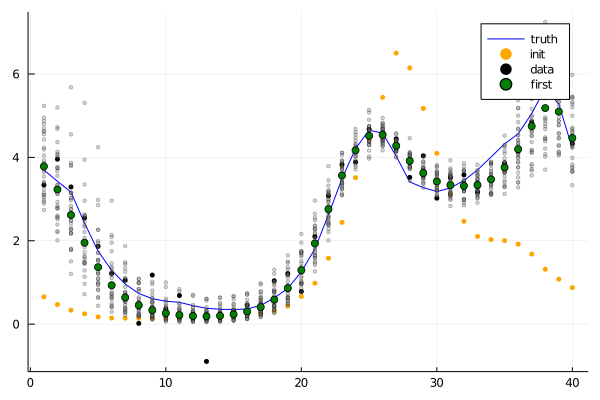

In [8]:
plot_iteration = (params, label) -> let
    #error_mat = mgvi_kl_errors(full_model, params)
    #display(error_mat)
    #errors = sqrt.(error_mat[diagind(error_mat)])
    #yerr = abs.(line(common_grid, params+errors) - line(common_grid, params-errors))
    #scatter!(common_grid, line(common_grid, params), markercolor=:green, label=label, yerr=yerr)
    for sample in eachcol(params.samples)
        scatter!(_common_grid, _mean(Vector(sample)), markercolor=:gray, markeralpha=0.3, markersize=2, label=nothing)
    end
    scatter!(_common_grid, _mean(params.result), markercolor=:green, label=label)    
end
    
plot()
init_plots()
plot_iteration(first_iteration, "first")

In [9]:
plot_iteration_light = (params, counter) -> let
    scatter!(_common_grid, _mean(params.result), markercolor=:green, markersize=3, markeralpha=2*atan(counter/18)/π, label=nothing)
end

#21 (generic function with 1 method)

64.77583261134043

40×2 Array{Float64,2}:
  0.339621    0.48151
 -0.844095   -0.564916
  2.14009     1.63042
 -0.459984   -1.14073
  0.108016    0.867529
 -0.379951    0.0598623
 -0.501476   -1.64938
 -0.620282   -0.552528
 -0.0835519  -0.472529
 -0.360006   -0.468033
 -0.057287   -0.200177
 -0.156967   -0.944585
  0.0478841   0.75603
  ⋮          
 -0.402799   -0.268811
 -0.202115    0.0891861
 -0.526222   -2.73701
 -0.251873   -1.57267
 -0.493563   -0.859427
 -0.522093   -0.795277
 -0.542027   -0.75824
  0.113184   -0.572864
 -0.101712   -0.559156
  0.371183    0.841274
  0.720467    0.298653
  1.44257     1.25313

42.48073366486977

40×2 Array{Float64,2}:
  0.421685    0.48151
 -0.710456   -0.564916
  2.12693     1.63042
 -0.46686    -1.14073
 -0.140583    0.867529
 -0.540237    0.0598623
 -0.69376    -1.64938
 -0.705898   -0.552528
 -0.113596   -0.472529
 -0.358697   -0.468033
 -0.0440785  -0.200177
 -0.156697   -0.944585
  0.059696    0.75603
  ⋮          
 -0.411006   -0.268811
 -0.207796    0.0891861
 -0.537916   -2.73701
 -0.254328   -1.57267
 -0.507157   -0.859427
 -0.578332   -0.795277
 -0.644529   -0.75824
  0.0261898  -0.572864
 -0.240523   -0.559156
  0.166376    0.841274
  0.585817    0.298653
  1.35504     1.25313

40.15775580085319

40×2 Array{Float64,2}:
  0.434198    0.48151
 -0.681503   -0.564916
  2.09401     1.63042
 -0.557173   -1.14073
 -0.14902     0.867529
 -0.501464    0.0598623
 -0.638693   -1.64938
 -0.682734   -0.552528
 -0.0966406  -0.472529
 -0.347111   -0.468033
 -0.0389032  -0.200177
 -0.150142   -0.944585
  0.0598394   0.75603
  ⋮          
 -0.404742   -0.268811
 -0.203356    0.0891861
 -0.535722   -2.73701
 -0.249253   -1.57267
 -0.50028    -0.859427
 -0.555414   -0.795277
 -0.627263   -0.75824
  0.0434284  -0.572864
 -0.181917   -0.559156
  0.208211    0.841274
  0.521993    0.298653
  1.33605     1.25313

41.63203255975736

40×2 Array{Float64,2}:
  0.443836    0.48151
 -0.669901   -0.564916
  2.02563     1.63042
 -0.558607   -1.14073
 -0.0517214   0.867529
 -0.502015    0.0598623
 -0.632268   -1.64938
 -0.668579   -0.552528
 -0.0711919  -0.472529
 -0.341652   -0.468033
 -0.0359077  -0.200177
 -0.161628   -0.944585
  0.0565958   0.75603
  ⋮          
 -0.408495   -0.268811
 -0.204412    0.0891861
 -0.532126   -2.73701
 -0.255445   -1.57267
 -0.508015   -0.859427
 -0.598502   -0.795277
 -0.656984   -0.75824
  0.038306   -0.572864
 -0.170446   -0.559156
  0.321885    0.841274
  0.505191    0.298653
  1.31097     1.25313

41.02508459147488

40×2 Array{Float64,2}:
  0.435771    0.48151
 -0.681716   -0.564916
  2.07255     1.63042
 -0.542838   -1.14073
 -0.108759    0.867529
 -0.493521    0.0598623
 -0.624094   -1.64938
 -0.685475   -0.552528
 -0.0828922  -0.472529
 -0.361606   -0.468033
 -0.0306792  -0.200177
 -0.156922   -0.944585
  0.0604095   0.75603
  ⋮          
 -0.407472   -0.268811
 -0.198673    0.0891861
 -0.53724    -2.73701
 -0.256688   -1.57267
 -0.499081   -0.859427
 -0.589647   -0.795277
 -0.627396   -0.75824
  0.0514162  -0.572864
 -0.1835     -0.559156
  0.23062     0.841274
  0.527639    0.298653
  1.33261     1.25313

41.66481162729711

40×2 Array{Float64,2}:
  0.449896    0.48151
 -0.664567   -0.564916
  2.01181     1.63042
 -0.540156   -1.14073
 -0.116664    0.867529
 -0.467325    0.0598623
 -0.664075   -1.64938
 -0.669091   -0.552528
 -0.103716   -0.472529
 -0.3576     -0.468033
 -0.0370567  -0.200177
 -0.161859   -0.944585
  0.052658    0.75603
  ⋮          
 -0.411536   -0.268811
 -0.200113    0.0891861
 -0.536215   -2.73701
 -0.257059   -1.57267
 -0.485812   -0.859427
 -0.571245   -0.795277
 -0.638505   -0.75824
  0.0620797  -0.572864
 -0.180985   -0.559156
  0.279967    0.841274
  0.510828    0.298653
  1.30278     1.25313

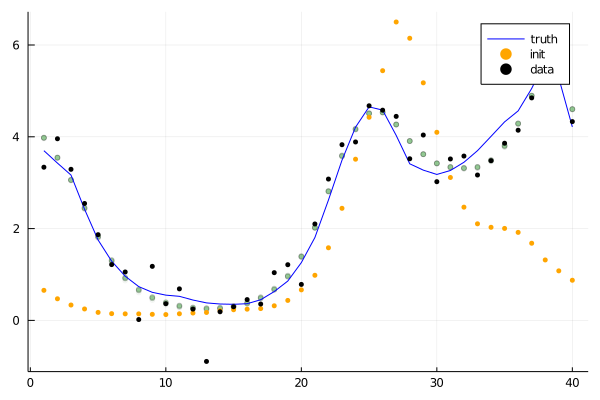

In [15]:
plt = scatter()
next_iteration = first_iteration
for i in 1:5
    display(minimum(next_iteration.optimized))
    display(hcat(next_iteration.result, true_params))
    next_iteration = mgvi_kl_optimize_step(model, data, next_iteration.result;
        jacobian_func=FwdRevADJacobianFunc,
        residual_sampler=ImplicitResidualSampler,
        optim_options=Optim.Options(g_reltol=1E-2, g_abstol=1E-2))
    plot_iteration_light(next_iteration, i)
end
display(minimum(next_iteration.optimized))
display(hcat(next_iteration.result, true_params))

init_plots()
display(plt)

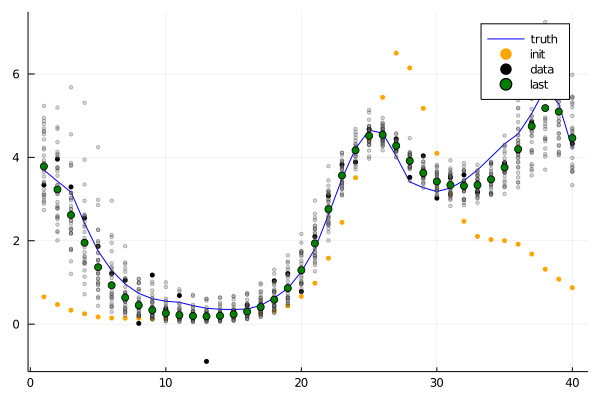

In [11]:
plot()
init_plots()
plot_iteration(next_iteration, "last")